In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from tensorflow import keras
import tensorflow
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout,BatchNormalization,GlobalAveragePooling2D,Dropout,GlobalMaxPooling2D
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet import MobileNet
from keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.applications import Xception,NASNetMobile,DenseNet121,MobileNetV2,InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions
from tensorflow.keras.applications.vgg19 import preprocess_input, decode_predictions
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Layer, MultiHeadAttention
from tensorflow.keras.layers import LayerNormalization
from tensorflow.keras.models import Sequential
from keras.optimizers import Adam
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from glob import glob

In [3]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Set paths
data_dir = '/kaggle/input/alz-data/Alz_data'
train_dir = '/kaggle/working/train'
val_dir = '/kaggle/working/val'
test_dir = '/kaggle/working/test'

# Create directories if not exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
# Split the data
for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        images = os.listdir(class_path)
        
        train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
        train_images, val_images = train_test_split(train_images, test_size=0.2, random_state=42)

        # Ensure class subdirectories exist in train, val, and test folders
        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

        # Copy images to train, val, and test directories
        for image in train_images:
            shutil.copy(os.path.join(class_path, image), os.path.join(train_dir, class_name, image))

        for image in val_images:
            shutil.copy(os.path.join(class_path, image), os.path.join(val_dir, class_name, image))

        for image in test_images:
            shutil.copy(os.path.join(class_path, image), os.path.join(test_dir, class_name, image))

In [4]:
train_datagen = ImageDataGenerator( 
                                   rescale=1./255,
#                                    rotation_range=20,
#                                    width_shift_range=0.2,
#                                    height_shift_range=0.2,
#                                    shear_range=0.2,
#                                    zoom_range=0.2,
#                                    horizontal_flip=True,
#                                    vertical_flip=True,
                                   #brightness_range=[0.5, 1.5],
                                  ) 
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(  rescale=1./255.0)
training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 color_mode='grayscale'
                                                 )
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            color_mode='grayscale',
                                            shuffle=False)
val_set = val_datagen.flow_from_directory(val_dir,
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            color_mode='grayscale'
                                            )

Found 53065 images belonging to 4 classes.
Found 16585 images belonging to 4 classes.
Found 13266 images belonging to 4 classes.


In [5]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
import tensorflow as tf  
from tensorflow.keras.layers import GlobalAveragePooling2D, concatenate  
from tensorflow.keras.models import Model 
img_size = (224,224,1)

In [6]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, (1,1), activation='relu', input_shape=img_size),
    layers.BatchNormalization(), 
    keras.layers.MaxPooling2D(3,3),
    keras.layers.Conv2D(32, (1,1), activation='relu'),
    keras.layers.Conv2D(32, (3,3), activation='relu'), 
    layers.BatchNormalization(), 
    keras.layers.MaxPooling2D(3,3),    
    keras.layers.Conv2D(64, (1,1), activation='relu'),
    layers.BatchNormalization(), 
     keras.layers.Conv2D(64, (5,5), activation='relu'),
    layers.BatchNormalization(), 
    keras.layers.MaxPooling2D(3,3),
    keras.layers.Conv2D(16, (1,1), activation='relu'),
    layers.BatchNormalization(), 
     keras.layers.Conv2D(16, (5,5), activation='relu'),
    layers.BatchNormalization(), 
    keras.layers.Flatten(), 
    keras.layers.Dense(4, activation='softmax')  
])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 16)   │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 74, 74, 32)     │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 72, 72, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 20, 20, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 20, 20, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 6, 6, 16)       │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 6, 6, 16)       │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 2, 2, 16)       │         6,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 2, 2, 16)       │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,948 (480.27 KB)

 Trainable params: 122,532 (478.64 KB)

 Non-trainable params: 416 (1.62 KB)

In [7]:
# Compile the model with a more gradual learning rate scheduler
initial_lr = 1e-4
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: initial_lr * (1.05 ** epoch))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [8]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
checkpoint = ModelCheckpoint("Student Engagement Model.keras", monitor='val_accuracy', verbose=1,
                             save_best_only=True, save_weights_only=False, mode='auto')
early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=9, verbose=1, mode='auto')


history = model.fit(training_set, validation_data= val_set,
                           epochs=20,callbacks=[])

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1735067780.435867      86 service.cc:145] XLA service 0x796e38001d70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1735067780.435951      86 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


   3/1659 ━━━━━━━━━━━━━━━━━━━━ 1:43 62ms/step - accuracy: 0.4774 - loss: 1.3357 

I0000 00:00:1735067785.379806      86 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1659/1659 ━━━━━━━━━━━━━━━━━━━━ 226s 131ms/step - accuracy: 0.8120 - loss: 0.4621 - val_accuracy: 0.9126 - val_loss: 0.2335
Epoch 2/20
1659/1659 ━━━━━━━━━━━━━━━━━━━━ 215s 129ms/step - accuracy: 0.9343 - loss: 0.1792 - val_accuracy: 0.9456 - val_loss: 0.1468
Epoch 3/20
1659/1659 ━━━━━━━━━━━━━━━━━━━━ 212s 128ms/step - accuracy: 0.9734 - loss: 0.0755 - val_accuracy: 0.9640 - val_loss: 0.1029
Epoch 4/20
1659/1659 ━━━━━━━━━━━━━━━━━━━━ 213s 128ms/step - accuracy: 0.9837 - loss: 0.0481 - val_accuracy: 0.9656 - val_loss: 0.1010
Epoch 5/20
1659/1659 ━━━━━━━━━━━━━━━━━━━━ 212s 127ms/step - accuracy: 0.9878 - loss: 0.0348 - val_accuracy: 0.9766 - val_loss: 0.0686
Epoch 6/20
1659/1659 ━━━━━━━━━━━━━━━━━━━━ 212s 127ms/step - accuracy: 0.9907 - loss: 0.0280 - val_accuracy: 0.9732 - val_loss: 0.0727
Epoch 7/20
1659/1659 ━━━━━━━━━━━━━━━━━━━━ 211s 127ms/step - accuracy: 0.9927 - loss: 0.0227 - val_accuracy: 0.9793 - val_loss: 0.0638
Epoch 8/20
1659/1659 ━━━━━━━━━━━━━━━━━━━━ 211s 127ms/step - accuracy: 0.9

In [9]:
model.evaluate(test_set)

519/519 ━━━━━━━━━━━━━━━━━━━━ 53s 102ms/step - accuracy: 0.9802 - loss: 0.0923


[0.055354196578264236, 0.9861923456192017]

In [10]:
# from tensorflow.keras.models import load_model

# # Load the model
# model = load_model('/kaggle/working/best_model.keras')

# # Evaluate the model using your test dataset
# # Assuming `x_test` and `y_test` are your test data and labels
# test_loss, test_accuracy = model.evaluate(test_set)

# print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
# print(f"Test Loss: {test_loss:.4f}")

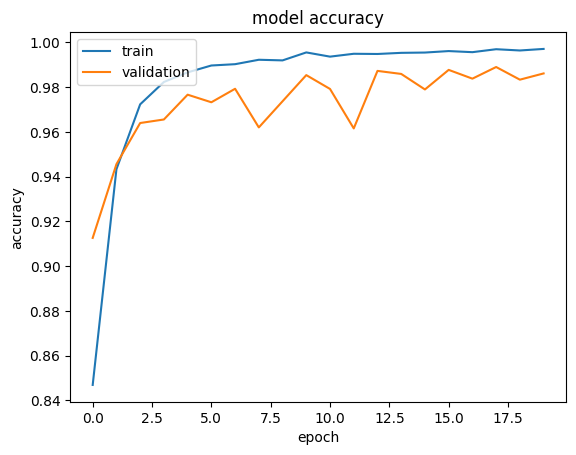

In [11]:
#accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

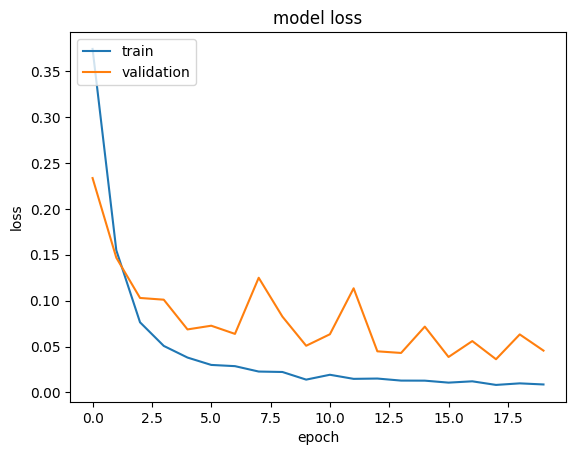

In [12]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [13]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict on test data
y_pred_probs = model.predict(test_set)  # Get predicted probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class indices
y_true = test_set.classes  # True labels

# Get class labels
class_labels = list(test_set.class_indices.keys())

519/519 ━━━━━━━━━━━━━━━━━━━━ 53s 101ms/step


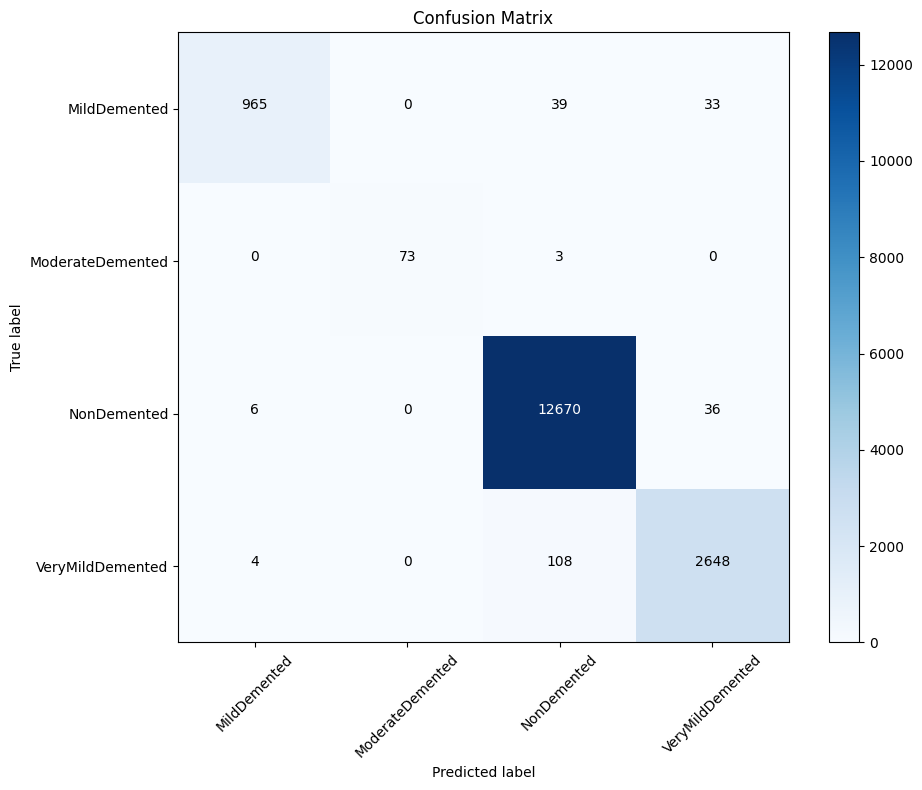

In [14]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Add text annotations
thresh = cm.max() / 2
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [15]:
# Generate the classification report as a dictionary
report_dict = classification_report(y_true, y_pred, target_names=class_labels, output_dict=True)

# Convert the dictionary to a DataFrame for better formatting
report_df = pd.DataFrame(report_dict).transpose()

# Format values to 4 decimal places
report_df = report_df.round(4)

print("Classification Report:\n", report_df)

Classification Report:
                   precision  recall  f1-score     support
MildDemented         0.9897  0.9306    0.9592   1037.0000
ModerateDemented     1.0000  0.9605    0.9799     76.0000
NonDemented          0.9883  0.9967    0.9925  12712.0000
VeryMildDemented     0.9746  0.9594    0.9670   2760.0000
accuracy             0.9862  0.9862    0.9862      0.9862
macro avg            0.9882  0.9618    0.9746  16585.0000
weighted avg         0.9862  0.9862    0.9861  16585.0000


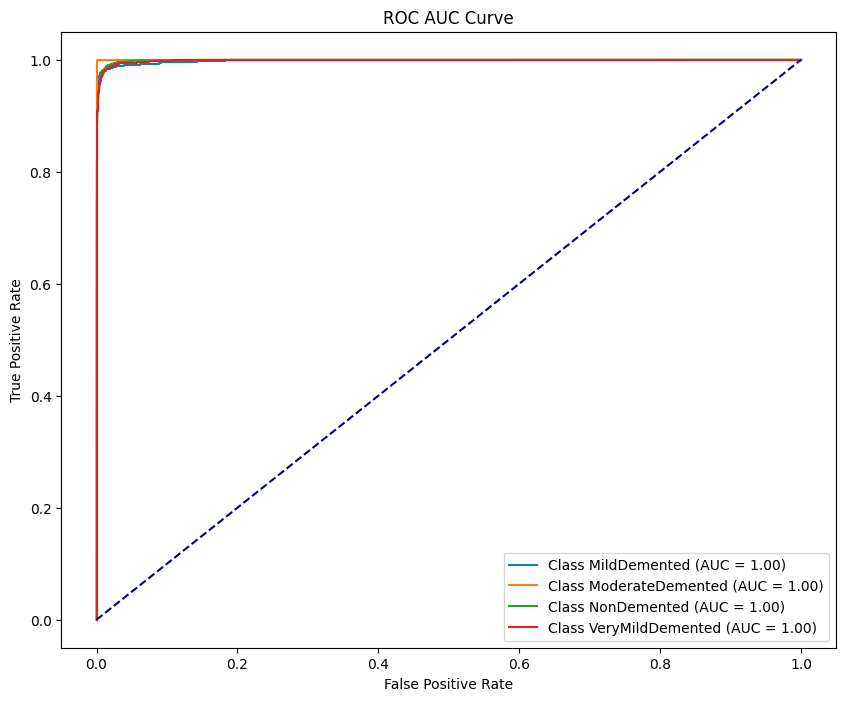

In [16]:
# One-hot encode true labels
y_true_one_hot = tf.keras.utils.to_categorical(y_true, num_classes=len(class_labels))

# Compute ROC AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve(y_true_one_hot[:, i], y_pred_probs[:, i])
    roc_auc[i] = roc_auc_score(y_true_one_hot[:, i], y_pred_probs[:, i])

# Plot ROC Curve
plt.figure(figsize=(10, 8))
for i in range(len(class_labels)):
    plt.plot(fpr[i], tpr[i], label=f'Class {class_labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc='lower right')
plt.show()

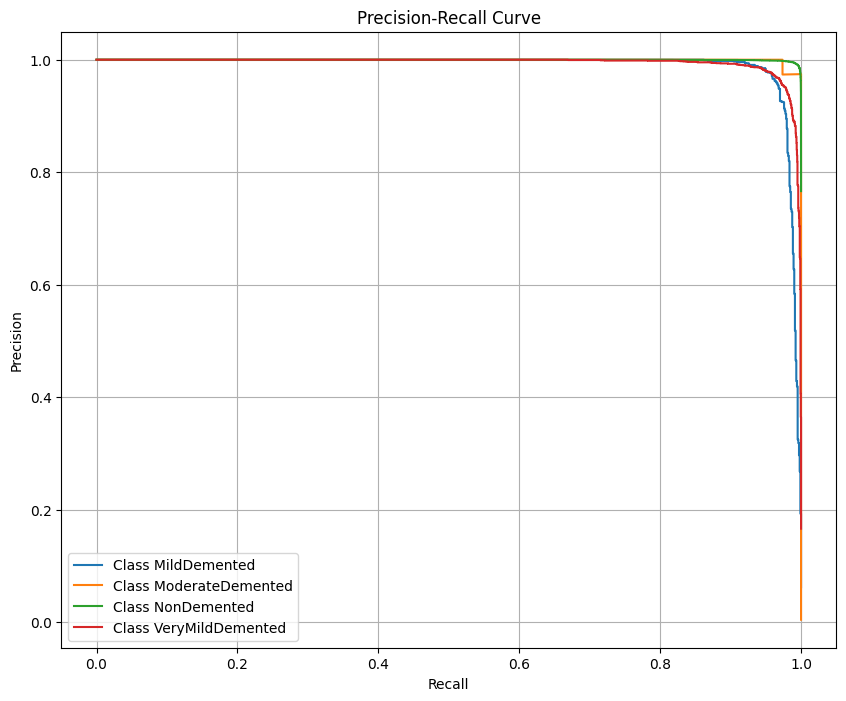

In [17]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall curve for each class
precision = {}
recall = {}

for i in range(len(class_labels)):
    precision[i], recall[i], _ = precision_recall_curve(y_true_one_hot[:, i], y_pred_probs[:, i])

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 8))
for i in range(len(class_labels)):
    plt.plot(recall[i], precision[i], label=f'Class {class_labels[i]}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid()
plt.show()


519/519 ━━━━━━━━━━━━━━━━━━━━ 52s 101ms/step


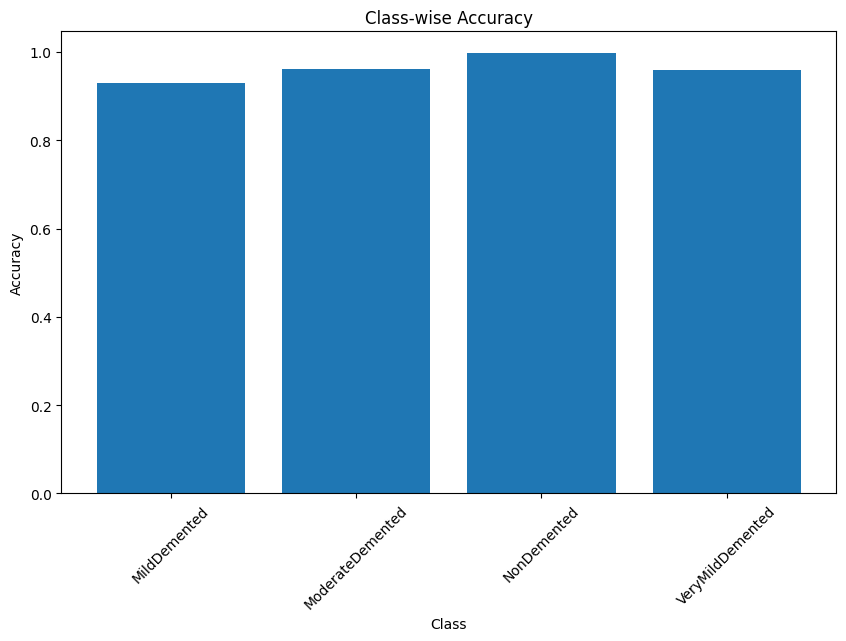

In [18]:
# Evaluate on test data
y_pred = np.argmax(model.predict(test_set), axis=1)
y_true = test_set.classes

# Class-wise accuracy
class_accuracies = {}
for i, class_name in enumerate(class_labels):
    class_indices = np.where(y_true == i)[0]
    correct_predictions = np.sum(y_pred[class_indices] == i)
    class_accuracies[class_name] = correct_predictions / len(class_indices)

# Plot Class-wise Accuracy
plt.figure(figsize=(10, 6))
plt.bar(class_accuracies.keys(), class_accuracies.values())
plt.xticks(rotation=45)
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Class-wise Accuracy')
plt.show()


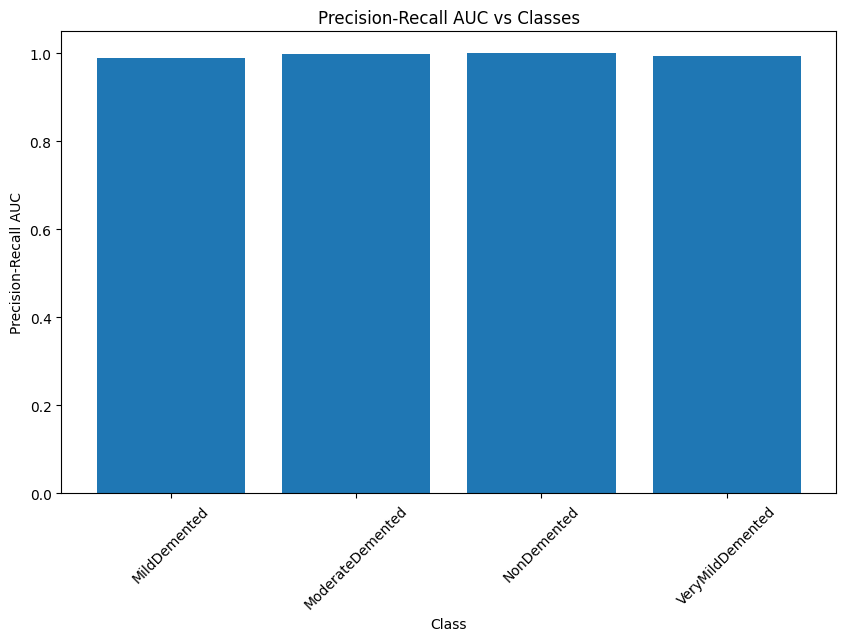

In [19]:
from sklearn.metrics import average_precision_score

pr_auc = []
for i in range(len(class_labels)):
    auc = average_precision_score(y_true_one_hot[:, i], y_pred_probs[:, i])
    pr_auc.append(auc)

# Plot Precision-Recall AUC
plt.figure(figsize=(10, 6))
plt.bar(class_labels, pr_auc)
plt.xticks(rotation=45)
plt.xlabel('Class')
plt.ylabel('Precision-Recall AUC')
plt.title('Precision-Recall AUC vs Classes')
plt.show()


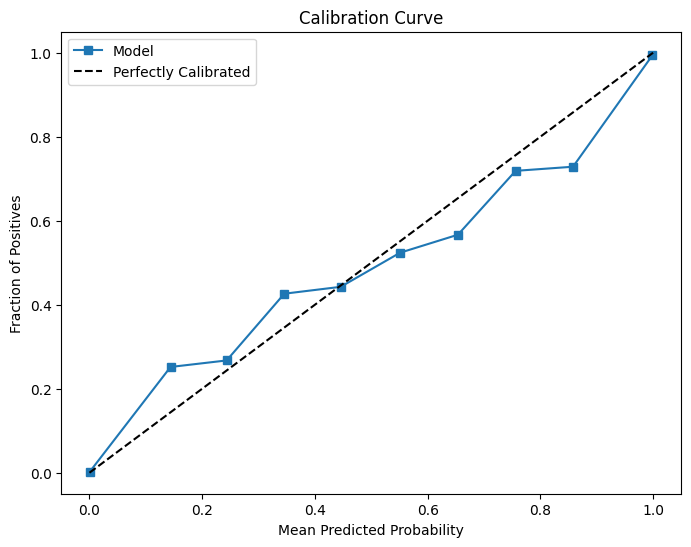

In [20]:
from sklearn.calibration import calibration_curve

y_prob = y_pred_probs.flatten()
y_true_flat = y_true_one_hot.flatten()

fraction_of_positives, mean_predicted_value = calibration_curve(y_true_flat, y_prob, n_bins=10)

plt.figure(figsize=(8, 6))
plt.plot(mean_predicted_value, fraction_of_positives, 's-', label='Model')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()
plt.show()


519/519 ━━━━━━━━━━━━━━━━━━━━ 52s 100ms/step


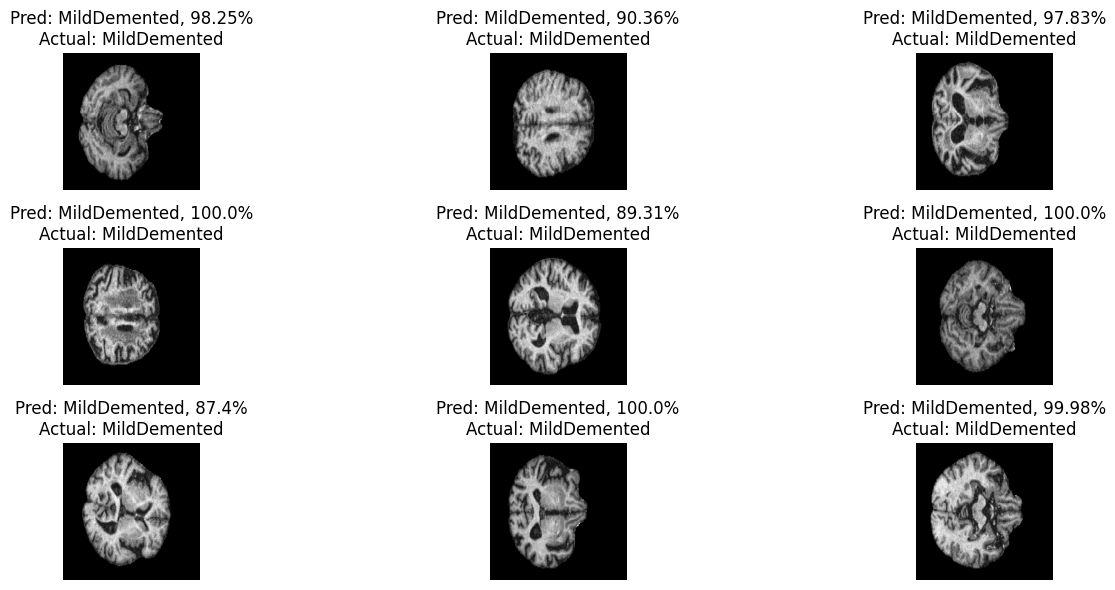

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Assuming `model` is your trained model
# Get the predictions (probabilities) for all images in the test set
preds = model.predict(test_set, verbose=1)  # This returns the predicted probabilities
probas = np.max(preds, axis=1)  # Get the highest probability for each prediction

# Reverse the class indices to get a mapping of index to class name
index_label = {v: k for k, v in test_set.class_indices.items()}

# Create a 3x3 subplot grid
fig, axes = plt.subplots(3, 3, figsize=(15, 6))
index = 0

for i in range(3):
    for j in range(3):
        # Get a batch of images and labels from the test_set
        images, labels = test_set[index]
        
        # Ensure the image is in uint8 format and scale if necessary
        image = np.array(images[0])  # Get the first image in the batch
        if image.max() <= 1.0:  # If the image is normalized (values between 0 and 1)
            image = (image * 255).astype(np.uint8)  # Scale to 0-255 and convert to uint8
        
        # Show the first image in the batch (grayscale)
        axes[i][j].imshow(image, cmap='gray')  # Use 'gray' colormap for grayscale images
        
        # Display the predicted probability as percentage and actual label
        axes[i][j].set_title("Pred: {}, {}%\nActual: {}".format(
            index_label[np.argmax(preds[index])],  # Predicted label
            round(probas[index] * 100, 2),  # Predicted probability in percentage (rounded to 2 decimal places)
            index_label[np.argmax(labels)]  # Actual label
        ))
        
        # Hide axes for a cleaner look
        axes[i][j].axis('off')
        
        index += 1
        if index >= len(test_set):  # Prevent going out of bounds if there are fewer than 9 images
            break

plt.tight_layout()
plt.show()
